In [1]:
import cv_detect as sg
import cv2 as cv
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt


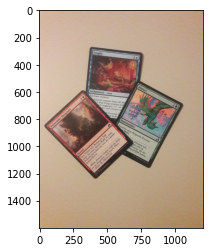

In [12]:
src = cv.imread("../../images/cards.jpeg", 1)
if src is None:
    print('Could not open or find the image.')
    exit(0)


plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))


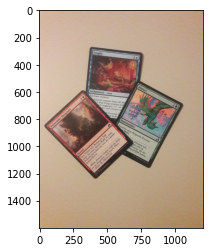

In [13]:
# Change the background from white to black, since that will help later to extract
# better results during the use of Distance Transform
src[np.all(src == 255, axis=2)] = 0
# Show output image
plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))

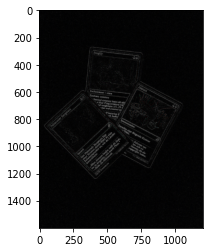

In [15]:
# Create a kernel that we will use to sharpen our image
# an approximation of second derivative, a quite strong kernel
kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype=np.float32)
# do the laplacian filtering as it is
# well, we need to convert everything in something more deeper then CV_8U
# because the kernel has some negative values,
# and we can expect in general to have a Laplacian image with negative values
# BUT a 8bits unsigned int (the one we are working with) can contain values from 0 to 255
# so the possible negative number will be truncated
imgLaplacian = cv.filter2D(src, cv.CV_32F, kernel)
sharp = np.float32(src)
imgResult = sharp - imgLaplacian
# convert back to 8bits gray scale
imgResult = np.clip(imgResult, 0, 255)
imgResult = imgResult.astype('uint8')
imgLaplacian = np.clip(imgLaplacian, 0, 255)
imgLaplacian = np.uint8(imgLaplacian)

plt.imshow(cv.cvtColor(imgLaplacian, cv.COLOR_BGR2RGB))

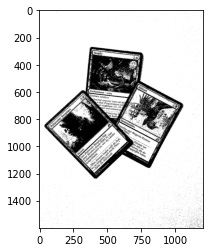

In [19]:

# Now we transform our new sharpened source image to a grayscale and a binary one, respectively:

# Create binary image from source image
bw = cv.cvtColor(imgResult, cv.COLOR_BGR2GRAY)
_, bw = cv.threshold(bw, 40, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
plt.imshow(cv.cvtColor(bw, cv.COLOR_BGR2RGB))

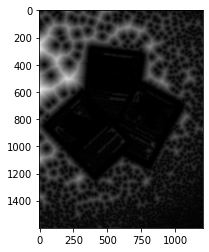

In [20]:
# Perform the distance transform algorithm
dist = cv.distanceTransform(bw, cv.DIST_L2, 3)
# Normalize the distance image for range = {0.0, 1.0}
# so we can visualize and threshold it
cv.normalize(dist, dist, 0, 1.0, cv.NORM_MINMAX)

plt.imshow(cv.cvtColor(dist, cv.COLOR_BGR2RGB))

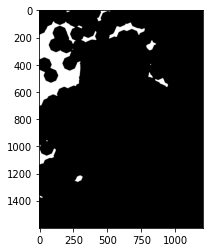

In [22]:
# Threshold to obtain the peaks
# This will be the markers for the foreground objects
_, dist = cv.threshold(dist, 0.4, 1.0, cv.THRESH_BINARY)
# Dilate a bit the dist image
kernel1 = np.ones((3,3), dtype=np.uint8)
dist = cv.dilate(dist, kernel1)
plt.imshow(cv.cvtColor(dist, cv.COLOR_BGR2RGB))